# Ex06 Scatter matrix

In [1]:
import pandas as pd
import sqlite3
from pandas.plotting import scatter_matrix

In [2]:
con = sqlite3.connect("../data/checking-logs.sqlite")
cur = con.cursor()

In [3]:
views_diff = pd.read_sql(""" 
            SELECT 
                t.uid,
                AVG((CAST(strftime('%s', first_commit_ts) AS INT) - deadlines) / 3600) as avg_diff,
                COUNT(*) as pageviews         
            FROM test t LEFT JOIN deadlines d ON d.labs = t.labname
            LEFT JOIN pageviews ON t.uid = pageviews.uid
            WHERE t.labname != 'project1'
            GROUP BY t.uid
            
            """,
            con)
views_diff

,uid,avg_diff,pageviews
0,user_1,-64.400000,140
1,user_10,-74.800000,445
2,user_14,-159.000000,429
3,user_17,-61.600000,235
4,user_18,-5.666667,9
5,user_19,-98.750000,64
6,user_21,-95.500000,40
7,user_25,-92.600000,895
8,user_28,-86.400000,745
9,user_3,-105.400000,1585


In [4]:
commits_count = pd.read_sql(""" 
            SELECT 
               uid, COUNT(*) as num_commits
            FROM checker c
            WHERE c.labname != 'project1'
            GROUP BY uid
            """,
            con)
commits_count

,uid,num_commits
0,None,4
1,admin_1,7
2,admin_2,1
3,user_0,3
4,user_1,62
5,user_10,20
6,user_11,7
7,user_12,86
8,user_13,52
9,user_14,61


In [5]:
views_diff = views_diff.merge(commits_count, how = 'left', on = 'uid')

In [6]:
views_diff.count()

uid            11
avg_diff       11
pageviews      11
num_commits    11
dtype: int64

In [7]:
views_diff.corr(numeric_only=True)

,avg_diff,pageviews,num_commits
avg_diff,1.000000,-0.185834,-0.304931
pageviews,-0.185834,1.000000,-0.186776
num_commits,-0.304931,-0.186776,1.000000


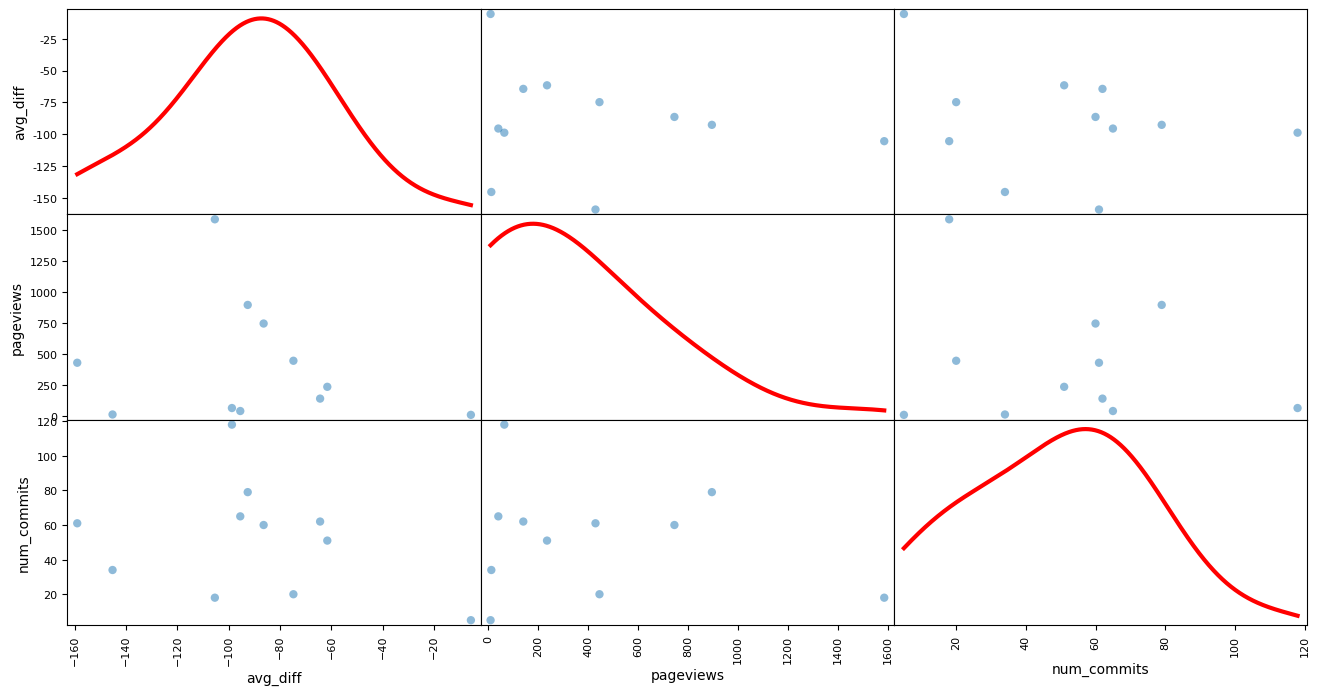

In [8]:
axes = scatter_matrix(views_diff,diagonal='kde',figsize=(16,8),marker=200)
for ax in axes.ravel():
    for line in ax.lines:
        line.set_linewidth(3)
        line.set_color('red')

* Можно ли сказать, что если у пользователя мало просмотров страниц, то, скорее всего, у него мало и коммитов?

Нет

* Можем ли мы сказать, что если у пользователя мало просмотров страниц, то у него, скорее всего, небольшая средняя разница между первым коммитом и крайним сроком выполнения лабораторных работ?

Нет

* Можем ли мы сказать, что есть много пользователей с малым количеством коммитов и несколько с большим количеством коммитов»?

Да

* Можно ли сказать, что есть много пользователей с небольшой средней разницей и несколько с большой средней разницей»?

Нет

In [9]:
con.close()